In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

In [4]:
data_type_list = ['source_list', 'cam_param', 'cam_3d', 'img_2d', 'cam_3d_canonical_same_z', 'img_2d_canonical_same_z']
overwrite_list = []
dataset_name = '3dhp'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading 3DHP source_list...
[overwrite: False] ==> Loading 3DHP cam_param...
[overwrite: False] ==> Loading 3DHP cam_3d...
[overwrite: False] ==> Loading 3DHP img_2d...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_same_z...
[overwrite: False] ==> Loading 3DHP img_2d_canonical_same_z...


In [5]:
source_list = data['source_list'].copy()
source = source_list[0]
subject_3dhp, cam_id_3dhp, action_3dhp = split_source_name(source, dataset_name)
cam_param = data['cam_param'][subject_3dhp][action_3dhp][cam_id_3dhp].copy()
#W, H, R, t, C, intrinsic, extrinsic = cam_param['W'], cam_param['H'], cam_param['R'], cam_param['t'], cam_param['C'], cam_param['intrinsic'], cam_param['extrinsic']
W_orig, H_orig, intrinsic_orig = cam_param['W'], cam_param['H'], cam_param['intrinsic']

cam_3d_canonical = data['cam_3d_canonical_same_z'][subject_3dhp][action_3dhp][cam_id_3dhp].copy()
img_2d_canonical = data['img_2d_canonical_same_z'][subject_3dhp][action_3dhp][cam_id_3dhp].copy()
img_2d_canonical_norm = normalize_input(img_2d_canonical, W_orig, H_orig)

In [8]:
fig = plt.figure(0)
fig.clear()
ax_3d = axes_3d(fig, loc=131, mode='cam')
ax_2d = axes_2d(fig, loc=132, W=W_orig, H=H_orig)
ax_2d_norm = axes_2d(fig, loc=133)

In [9]:
data_type_list = ['source_list', 'cam_param']
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data_h36m = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...


In [10]:
source = data_h36m['source_list'][0]
subject_h36m, cam_id_h36m, action_h36m = split_source_name(source, dataset_name)
print(subject_h36m, cam_id_h36m, action_h36m)
cam_param_h36m = data_h36m['cam_param'][subject_h36m][action_h36m][cam_id_h36m].copy()
W_h36m, H_h36m, intrinsic_h36m = cam_param_h36m['W'], cam_param_h36m['H'], cam_param_h36m['intrinsic']
img_2d_canonical_from_h36m_param = projection(cam_3d_canonical, intrinsic_h36m)
img_2d_canonical_from_h36m_param_norm = normalize_input(img_2d_canonical_from_h36m_param, W_h36m, H_h36m)

S1 54138969 Waiting 1


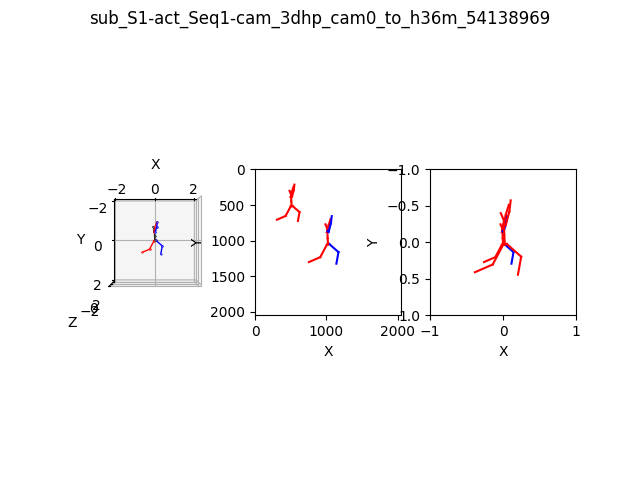

In [11]:
title = f"sub_{subject_3dhp}-act_{action_3dhp}-cam_3dhp_{cam_id_3dhp}_to_h36m_{cam_id_h36m}"

def plot_func(frame_num):
    clear_axes([ax_3d, ax_2d, ax_2d_norm])
    draw_3d_pose(ax_3d, cam_3d_canonical[frame_num])
    draw_2d_pose(ax_2d, img_2d_canonical[frame_num])
    draw_2d_pose(ax_2d, img_2d_canonical_from_h36m_param[frame_num], color='r')
    draw_2d_pose(ax_2d_norm, img_2d_canonical_norm[frame_num], normalize=True)
    draw_2d_pose(ax_2d_norm, img_2d_canonical_from_h36m_param_norm[frame_num], normalize=True, color='r')
    
plot_func(300)
fig.suptitle(title)
plt.show()

In [13]:
save_folder = f'/home/hrai/codes/MotionBERT/videos/input/3dhp/compare_intrinsic_change/'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = f'{save_folder}/{title}.mp4'
if not os.path.exists(save_path):
    generate_plot_video(fig, save_path, len(cam_3d_canonical), plot_func, fps=5, stride=6)
else:
    print(f"File already exists: {save_path}")

File already exists: /home/hrai/codes/MotionBERT/videos/input/3dhp/compare_intrinsic_change//sub_S1-act_Seq1-cam_3dhp_cam0_to_h36m_54138969.mp4
